In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from pathlib import Path
from urlpath import URL
import json
import glob 
import numpy as np
import seaborn as sns
from skimage.measure import shannon_entropy
import string
import nltk
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# https://pypi.org/project/pytesseract/
# sudo apt install tesseract-ocr
import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

from prepareCSV import cleanOcrText
pd.options.display.max_columns = None

[nltk_data] Downloading package words to /home/lilatee/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lilatee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lilatee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/lilatee/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/lilatee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_

In [2]:
df = pd.read_csv("./GB_new_columns.csv")
df = df.loc[:, ["video_id", "thumbnail_link", 'region']]
region = df['region'][0]
print(df.shape)
df[:3]

(3235, 3)


,video_id,thumbnail_link,region
0,Jw1Y-zhQURU,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,GB
1,3s1rvMFUweQ,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,GB
2,n1WpP7iowLc,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,GB


### Pobieranie thumbnaili

In [ ]:
def readJSONList(path):
    with open(path, 'r') as file:
        loaded_list = json.loads(file.read())
    return loaded_list

def writeJSONList(path, list_to_save):
    with open(path, 'w') as file:
        file.write(json.dumps(list_to_save))

def downloadThumbnails(df, quality='hq'):
    list_of_ids_without_thumbnail = []
    ids = df["video_id"].values
    urls = df["thumbnail_link"].values
    
    region = df['region'][0]
    Path("./data/thumbnailsHQ/" + region).mkdir(parents=True, exist_ok=True)
    savepath = Path("./data/thumbnailsHQ/" + region)
    filename = quality + 'default.jpg'
    
    for id, url in zip(ids, urls): 
        temp_url = URL(url)
        temp_url = temp_url.parent / filename
        
        try:
            img = io.imread(str(temp_url))
        except Exception:
            list_of_ids_without_thumbnail.append(id)
            print(f"{id} no thumbnail")
            continue
        io.imsave(savepath / (id + ".png") , img)
    
    writeJSONList(savepath / "ids_without_thumbnail.txt", list_of_ids_without_thumbnail)
        
    return list_of_ids_without_thumbnail

In [ ]:
# list_of_ids_without_thumbnail = downloadThumbnails(df)
df.loc[df.video_id=="0Yp9WS6cJFA",:]

### Średnia wartość kanałów w obrazie, entropia, ocr tesseract

In [3]:
%%time
# Odkomentować zapis jeśli trzeba!!!
imgs_path = Path(f'./data/thumbnailsHQ/{region}')

for i, img_path in enumerate(glob.glob(f"{imgs_path}/*.png")): 
    path = Path(img_path)
    img = io.imread(path)
    n_of_pixels = img.shape[0]*img.shape[1]
    
    intensity = np.sum(img, axis=0)
    mean_intensity_each_channel = np.sum(intensity, axis=0)/n_of_pixels
    df.loc[df.video_id == path.stem, "r"] = mean_intensity_each_channel[0]
    df.loc[df.video_id == path.stem, "g"] = mean_intensity_each_channel[1]
    df.loc[df.video_id == path.stem, "b"] = mean_intensity_each_channel[2]
    df.loc[df.video_id == path.stem, "entropy"] = shannon_entropy(img)
    df.loc[df.video_id == path.stem, "thumb_ocr_text"] = pytesseract.image_to_string(img)
    
    if (i % 100 == 0):
        print(i, end='\r')

df["clean_thumb_ocr_text"] = df.apply(lambda row: cleanOcrText(row.thumb_ocr_text), axis=1)
df.to_csv(f"./our_data/Etap2/etap2_{region}-tesseract.csv", index=False)
df[:3]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
cleanOcrText: 0
cleanOcrText: 100
cleanOcrText: 200
cleanOcrText: 300
cleanOcrText: 400
cleanOcrText: 500
cleanOcrText: 600
cleanOcrText: 700
cleanOcrText: 800
cleanOcrText: 900
cleanOcrText: 1000
cleanOcrText: 1100
cleanOcrText: 1200
cleanOcrText: 1300
cleanOcrText: 1400
cleanOcrText: 1500
cleanOcrText: 1600
cleanOcrText: 1700
cleanOcrText: 1800
cleanOcrText: 1900
cleanOcrText: 2000
cleanOcrText: 2100
cleanOcrText: 2200
cleanOcrText: 2300
cleanOcrText: 2400
cleanOcrText: 2500
cleanOcrText: 2600
cleanOcrText: 2700
cleanOcrText: 2800
cleanOcrText: 2900
cleanOcrText: 3000
cleanOcrText: 3100
cleanOcrText: 3200
cleanOcrText: 3300
cleanOcrText: 3400
cleanOcrText: 3500
cleanOcrText: 3600
cleanOcrText: 3700
cleanOcrText

,video_id,thumbnail_link,region,r,g,b,entropy,thumb_ocr_text,clean_thumb_ocr_text
0,2kyS6SvSYSE,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,US,83.791198,77.128183,74.980914,6.818234,\n,
1,1ZAPwfrtAFY,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,US,53.131123,50.240133,55.462459,6.185228,\n,
2,5qpjK5DgCt4,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,US,NaN,NaN,NaN,NaN,NaN,


### CHECKPOINT

In [3]:
df = pd.read_csv(f"./our_data/Etap2/etap2_{region}-tesseract.csv")

In [ ]:
ocr_videos = df.loc[df.clean_thumb_ocr_text != '',:][["video_id","thumb_ocr_text","clean_thumb_ocr_text"]]
ocr_videos.shape

### Wizualizacja OCRa

In [ ]:
ocr_videos = df.loc[df.clean_thumb_ocr_text != '',:][["video_id","thumb_ocr_text","clean_thumb_ocr_text"]][:10]

n_of_cols = 3
n_of_rows = int(ocr_videos.shape[0]/n_of_cols)
fig, axes = plt.subplots(n_of_rows, n_of_cols, figsize=(n_of_cols*5, n_of_rows*5))

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        video = ocr_videos[i*n_of_cols+j:i*n_of_cols+j+1]
        video_id = video.video_id.values[0]
        path = Path(f'./data/thumbnailsHQ/{region}/{video_id}.png')
        
        ax.set_title(video.clean_thumb_ocr_text.values[0])
        img = io.imread(str(path))
        ax.imshow(img)

In [ ]:
ll = df.loc[df.clean_thumb_ocr_text != '',:][["thumb_ocr_text","clean_thumb_ocr_text"]].values
print(ll.shape)
print(df.shape)
# for el in ll:
#     print("="*100)
#     print(el[1])
#     print("="*100)
#     print(el[0])


### Lepszy OCR

#### [Rozpoznawanie napisów - https://github.com/clovaai/deep-text-recognition-benchmark](https://github.com/clovaai/deep-text-recognition-benchmark)

In [41]:
%run CRAFT-pytorch/test_modified.py \
    --trained_model="CRAFT-pytorch/craft_mlt_25k.pth" \
    --test_folder="data/thumbnailsHQ/{region}"\
    --cuda=True \
    --result_folder="data/OCR_result_CUDA_test/{region}/"

data/OCR_result_CUDA_test/US/
Loading weights from checkpoint (CRAFT-pytorch/craft_mlt_25k.pth)
elapsed time : 2121.466652393341sailsHQ/US/__Wd-iOZQ6k.png


#### Wycięcie fragmentów obrazów z napisami

In [43]:
from skimage import io
import numpy as np
from pathlib import Path
import glob
import json

def genSlicesWithText(CRAFT_path_results=f"./data/OCR_result/{region}/", path_images=f"./data/thumbnailsHQ/{region}", out_df_path=f"our_data/Etap2/etap2_ocr_{region}.csv"):
    def bounding_box(points):
        x_coordinates, y_coordinates = zip(*points)
        return [(int(min(x_coordinates)), int(min(y_coordinates))), (int(max(x_coordinates)), int(max(y_coordinates)))]

    CRAFT_path_results = Path(CRAFT_path_results)
    path_images = Path(path_images)
    
    result_df = pd.DataFrame(columns=['video_id', 'word_id' ,'ocr_text', 'bbox'])
    for j, result_path in enumerate(glob.glob(str(CRAFT_path_results) + "/*.txt")):
        result_path = Path(result_path)
        video_id = result_path.stem[4:] # removing "res_" to obtain video_id
        
        img_path = Path(path_images / (video_id + ".png"))
        img = io.imread(img_path)
        shape = img.shape

        bboxes_path = CRAFT_path_results / ('res_' + img_path.stem + ".txt")
        bboxes = []
        with open(bboxes_path, "r") as bboxFile:
            for line in bboxFile.readlines():
                numbers = np.array(line.split(',')).astype(int)
                points = []

                for x,y in zip(numbers[::2], numbers[1::2]):
                    points.append((x, y))
                bboxes.append(bounding_box(points))


        if len(bboxes) > 0:
                Path(CRAFT_path_results / "words" / img_path.stem).mkdir(parents=True, exist_ok=True)
                img_dir = Path(CRAFT_path_results / "words" / img_path.stem)

        for i, bbox in enumerate(bboxes):
            img_slice = img[max(bbox[0][1], 0): min(bbox[1][1], shape[0]), max(bbox[0][0], 0):min(bbox[1][0], shape[1])]
            result_df = result_df.append({
                'video_id': video_id , 
                'word_id': i , 
                'ocr_text': '', 
                'bbox': json.dumps(bbox)}, ignore_index=True
            )
            
            io.imsave(img_dir / f"{i}.png", img_slice)
            
        if j % 100 == 0:
            print(j, end='\r')
            
    result_df.to_csv(out_df_path, index=False)

out_df_path = f"our_data/Etap2/etap2_ocr_{region}.csv"
genSlicesWithText(CRAFT_path_results=f"./data/OCR_result/{region}/", path_images=f"./data/thumbnailsHQ/{region}", out_df_path=out_df_path )

<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/aujUl3yt6nM/1.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/cIQKKzZtWwQ/0.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/D5D90CLAILY/0.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/ErZDtWsCA9U/7.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/M-wat3TSQqY/5.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/OTLw9G1WpC4/1.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)
<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/OWz3Fa_qK5Q/3.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/ryr75N0nki0/0.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/tySwY8qXwbQ/5.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)
<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/tySwY8qXwbQ/6.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


<ipython-input-43-7018cdf9417d>:49: UserWarning: data/OCR_result/US/words/yW6ORWYn3g0/5.png is a low contrast image
  io.imsave(img_dir / f"{i}.png", img_slice)


#### [Wykrywanie napisów - https://github.com/clovaai/CRAFT-pytorch](https://github.com/clovaai/CRAFT-pytorch)

In [44]:
%run deep-text-recognition-benchmark/demo_modified.py \
--Transformation TPS \
--FeatureExtraction ResNet \
--SequenceModeling BiLSTM \
--Prediction Attn \
--image_folder "data/OCR_result/{region}/words/" \
--saved_model "deep-text-recognition-benchmark/TPS-ResNet-BiLSTM-Attn.pth" \
--out_df_path "{out_df_path}"

model input parameters 32 100 20 1 512 256 38 25 TPS ResNet BiLSTM Attn
loading pretrained model from deep-text-recognition-benchmark/TPS-ResNet-BiLSTM-Attn.pth


### Łączenie wykrytych napisów w jeden, aby zapisać w kolumnie. Przed tym czyszczenie tzn.:
- usuwanie stopwords, 
- usuwanie słów krótszych niż 2, 
- lematyzacja,
- sprawdzenie czy słowo istnieje w słowniku.

### CHECKPOINT

In [4]:
df_ocr = pd.read_csv(f"./our_data/Etap2/etap2_ocr_{region}.csv")
df_ocr[:5]

,video_id,word_id,ocr_text,bbox
0,-5WBCrazSfg,0,2,"[[94, 74], [116, 108]]"
1,-5WBCrazSfg,1,2,"[[94, 112], [116, 137]]"
2,-5WBCrazSfg,2,2,"[[56, 160], [82, 190]]"
3,-5WBCrazSfg,3,2,"[[128, 162], [148, 192]]"
4,-5WBCrazSfg,4,2,"[[89, 198], [113, 229]]"


In [10]:
from prepareCSV import concatAndCleanOcrTextV2
df_ocr = df_ocr.groupby(by="video_id", axis=0).apply(lambda x: concatAndCleanOcrTextV2(x)).reset_index()
df_ocr[:10]

,video_id,thumb_ocr_text_V2,clean_thumb_ocr_text_V2,bboxes
0,-1Hm41N0dUs,see 14 win jimmy scommel livei,see win jimmy,"[""[[192, 144], [221, 162]]"", ""[[249, 149], [29..."
1,-1yT-K3c6YI,truth or dare,truth dare,"[""[[156, 186], [285, 225]]"", ""[[166, 266], [28..."
2,-2RVw2_QyxQ,chawdows chess club cosco andischolatic conter,chess club conter,"[""[[115, 221], [155, 246]]"", ""[[150, 222], [18..."
3,-2aVkGcI7ZA,1,,[]
4,-2b4qSoMnKE,cnn,,[]
5,-2wRFv-mScQ,10 top moments celebrity game,top moment celebrity game,"[""[[24, 124], [113, 196]]"", ""[[232, 209], [362..."
6,-35jibKqbEo,skies casties glitter under spanish,sky glitter,"[""[[356, 158], [384, 168]]"", ""[[245, 160], [28..."
7,-37nIo_tLnk,wallace rasheed decemb ren,,[]
8,-39ysKKpE7I,first take,first take,"[""[[20, 232], [140, 261]]"", ""[[21, 258], [136,..."
9,-3h4Xt9No9o,sea ofokhotsk okhotak thaw 6 uncist part3 land...,sea thaw tra nome dutch god,"[""[[13, 208], [33, 217]]"", ""[[356, 48], [473, ..."


### Dodanie kolumny z wynikami nowego OCRa

In [28]:
df_ocr = df_ocr.set_index("video_id")
df = df.set_index("video_id").join(df_ocr).reset_index()
df["bboxes"] = df["bboxes"].fillna(json.dumps([]))
df[:5]

,video_id,thumbnail_link,region,r,g,b,entropy,thumb_ocr_text,clean_thumb_ocr_text,thumb_ocr_text_V2,clean_thumb_ocr_text_V2,bboxes
0,2kyS6SvSYSE,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,US,83.791198,77.128183,74.980914,6.818234,\n,NaN,NaN,NaN,[]
1,1ZAPwfrtAFY,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,US,53.131123,50.240133,55.462459,6.185228,\n,NaN,the trump presidency,trump presidency,"[""[[68, 169], [105, 178]]"", ""[[108, 169], [176..."
2,5qpjK5DgCt4,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,puqaWrEC7tY,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,US,85.942714,86.987807,84.269149,6.434697,\n,NaN,this at look photograph gmm youlube originals,look photograph original,"[""[[262, 169], [334, 216]]"", ""[[269, 190], [41..."
4,d380meD0W0M,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,US,111.840347,103.171238,102.399716,6.510005,\n,NaN,going baldzi dare youi,dare,"[""[[0, 262], [94, 297]]""]"


### Dodanie kolumny zawierającej średni punkt napisów w obrazie

In [6]:
def avg_texts_coords(bboxes):
    bboxes = json.loads(bboxes)
    if (len(bboxes) == 0):
        return json.dumps([-1, -1])
    middle_corrds_of_texts = []
    for bbox in bboxes:
        p1, p2 = json.loads(bbox)
        p1 = np.array(p1)
        p2 = np.array(p2)
        middle_text_coords = np.mean([p1, p2], axis=0)
        middle_corrds_of_texts.append(middle_text_coords)
#         print(p1, p2)
#         print(middle_text_coords)
    
    return json.dumps(list(np.mean(middle_corrds_of_texts, axis=0)))
    
df["avg_texts_coords"] = df.apply(lambda row: avg_texts_coords(row.bboxes), axis=1) 
df["avg_texts_coordX"] = df.apply(lambda row: json.loads(row.avg_texts_coords)[0],axis=1)
df["avg_texts_coordY"] = df.apply(lambda row: json.loads(row.avg_texts_coords)[1],axis=1)

df.to_csv(f"./our_data/Etap2/etap2_{region}-V22.csv", index=False)
df[:5]

,video_id,thumbnail_link,region,r,g,b,entropy,thumb_ocr_text,clean_thumb_ocr_text,thumb_ocr_text_V2,clean_thumb_ocr_text_V2,bboxes,avg_texts_coords
0,Jw1Y-zhQURU,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[-1, -1]"
1,3s1rvMFUweQ,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[-1, -1]"
2,n1WpP7iowLc,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,GB,66.502830,71.743704,79.699635,6.470819,\n,NaN,wigy water an vevo,water,"[""[[282, 116], [468, 204]]""]","[375.0, 160.0]"
3,PUTEiSjKwJU,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,GB,86.534334,73.284271,69.150666,6.839139,\n\ney tderr ott\n\nSTE a CLASS OF 92\n...,class,3 10 3 92 salford city class of 92 4 dudley2n ...,city class burton,"[""[[174, 262], [197, 277]]"", ""[[280, 262], [31...","[231.83333333333334, 279.1666666666667]"
4,rHwDegptbI4,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[-1, -1]"


### CHECKPOINT

In [7]:
df = pd.read_csv(f"./our_data/Etap2/etap2_{region}-V22.csv")
df[:5]

,video_id,thumbnail_link,region,r,g,b,entropy,thumb_ocr_text,clean_thumb_ocr_text,thumb_ocr_text_V2,clean_thumb_ocr_text_V2,bboxes,avg_texts_coords
0,Jw1Y-zhQURU,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[-1, -1]"
1,3s1rvMFUweQ,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[-1, -1]"
2,n1WpP7iowLc,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,GB,66.502830,71.743704,79.699635,6.470819,\n,NaN,wigy water an vevo,water,"[""[[282, 116], [468, 204]]""]","[375.0, 160.0]"
3,PUTEiSjKwJU,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,GB,86.534334,73.284271,69.150666,6.839139,\n\ney tderr ott\n\nSTE a CLASS OF 92\n...,class,3 10 3 92 salford city class of 92 4 dudley2n ...,city class burton,"[""[[174, 262], [197, 277]]"", ""[[280, 262], [31...","[231.83333333333334, 279.1666666666667]"
4,rHwDegptbI4,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[-1, -1]"


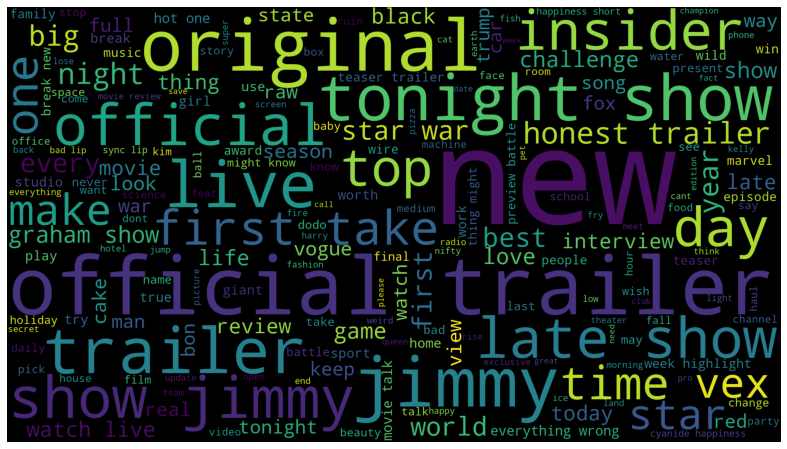

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure

df.loc[:, "clean_thumb_ocr_text_V2"] = df.loc[:, "clean_thumb_ocr_text_V2"].fillna('')
all_words = ' '.join(df.loc[:, "clean_thumb_ocr_text_V2"].values)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=1920, height=1080).generate(all_words)

figure(figsize=(16, 8))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Analiza sentymentu

In [52]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df["ocr_sentiment_compound"] = df.apply(lambda row: sia.polarity_scores(row.clean_thumb_ocr_text_V2)['compound'] ,axis=1)
df.to_csv(f"./our_data/Etap2/etap2_{region}-V22.csv", index=False)
df[:5]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lilatee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,video_id,thumbnail_link,region,r,g,b,entropy,thumb_ocr_text,clean_thumb_ocr_text,thumb_ocr_text_V2,clean_thumb_ocr_text_V2,bboxes,avg_texts_coords,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound
0,2kyS6SvSYSE,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,US,83.791198,77.128183,74.980914,6.818234,\n,NaN,NaN,,[],"[-1, -1]",-1.00,-1.000000,0.0000
1,1ZAPwfrtAFY,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,US,53.131123,50.240133,55.462459,6.185228,\n,NaN,the trump presidency,trump presidency,"[""[[68, 169], [105, 178]]"", ""[[108, 169], [176...","[114.25, 173.5]",114.25,173.500000,0.0000
2,5qpjK5DgCt4,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,[],"[-1, -1]",-1.00,-1.000000,0.0000
3,puqaWrEC7tY,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,US,85.942714,86.987807,84.269149,6.434697,\n,NaN,this at look photograph gmm youlube originals,look photograph original,"[""[[262, 169], [334, 216]]"", ""[[269, 190], [41...","[289.0, 235.66666666666666]",289.00,235.666667,0.3182
4,d380meD0W0M,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,US,111.840347,103.171238,102.399716,6.510005,\n,NaN,going baldzi dare youi,dare,"[""[[0, 262], [94, 297]]""]","[47.0, 279.5]",47.00,279.500000,0.0000
